In [2]:
import numpy as np
import pandas as pd

In [3]:
ser = pd.Series(np.random.random(5), name = "Column 01")
ser

0    0.428793
1    0.445065
2    0.675897
3    0.992875
4    0.761852
Name: Column 01, dtype: float64

Ser: dictionaries of the same data type 

In [4]:
ser[2]

0.6758965845664409

In [5]:
from pandas_datareader import data as wb # wb stats for web

In [6]:
AAPL = wb.DataReader('AAPL', data_source= 'yahoo', start='1995-1-1') # Apple's stock, time series, recorded price
AAPL

#Close and Adj close: will be different due to dividends paid
# Weekends and national holidays not included - includes trading days only 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,0.347098,0.338170,0.347098,0.342634,1.038688e+08,0.290871
1995-01-04,0.353795,0.344866,0.344866,0.351563,1.586816e+08,0.298451
1995-01-05,0.351563,0.345982,0.350446,0.347098,7.364000e+07,0.294660
1995-01-06,0.385045,0.367188,0.371652,0.375000,1.076622e+09,0.318347
1995-01-09,0.373884,0.366071,0.371652,0.367885,2.740864e+08,0.312307
...,...,...,...,...,...,...
2021-10-26,150.839996,149.009995,149.330002,149.320007,6.089340e+07,149.320007
2021-10-27,149.729996,148.490005,149.360001,148.850006,5.609490e+07,148.850006
2021-10-28,153.169998,149.720001,149.820007,152.570007,1.000779e+08,152.570007


Online soruces for financial: online and free 
python for finance

In [7]:
AAPL.info()
#we can see how many entries there are : 6749
# Time span of the data
# Number of data points, all rows are the same therefore, no missing data 
# all data type are floats

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6757 entries, 1995-01-03 to 2021-11-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       6757 non-null   float64
 1   Low        6757 non-null   float64
 2   Open       6757 non-null   float64
 3   Close      6757 non-null   float64
 4   Volume     6757 non-null   float64
 5   Adj Close  6757 non-null   float64
dtypes: float64(6)
memory usage: 369.5 KB


In [8]:
AAPL.head() # shows first 5 rows of the data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,0.347098,0.338170,0.347098,0.342634,1.038688e+08,0.290871
1995-01-04,0.353795,0.344866,0.344866,0.351563,1.586816e+08,0.298451
1995-01-05,0.351563,0.345982,0.350446,0.347098,7.364000e+07,0.294660
1995-01-06,0.385045,0.367188,0.371652,0.375000,1.076622e+09,0.318347
1995-01-09,0.373884,0.366071,0.371652,0.367885,2.740864e+08,0.312307


In [9]:
AAPL.tail() # shows last 5 rows of the data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-26,150.839996,149.009995,149.330002,149.320007,60893400.0,149.320007
2021-10-27,149.729996,148.490005,149.360001,148.850006,56094900.0,148.850006
2021-10-28,153.169998,149.720001,149.820007,152.570007,100077900.0,152.570007
2021-10-29,149.940002,146.410004,147.220001,149.800003,124850400.0,149.800003
2021-11-01,149.699997,147.800003,148.985001,148.960007,74588258.0,148.960007


How can we create data set- of 5 different companies: representing the adjusted closing price.
Repeat the same process, but need only last column

Step 1: Ticker symbol, create a dictionary of the keys 
Step 2: Create a data frame from pandas and call it new_data
Step 3: Iteration, for every ticker in tickers (using t for shortcut), provide me with a adj close for each ticker for each day
Step 4: To new data with index of t, assign the outcome of the data reader funciton for t(new data object) for yahoo

In [10]:
tickers = ['AAPL', 'GM', 'TSLA','NNDM','MARA']
new_data = pd.DataFrame()
for t in tickers: 
    new_data[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [11]:
new_data.tail()

,AAPL,GM,TSLA,NNDM,MARA
Date,,,,,
2021-10-26,149.320007,57.369999,1018.429993,5.89,52.860001
2021-10-27,148.850006,54.259998,1037.859985,5.70,50.040001
2021-10-28,152.570007,54.240002,1077.040039,5.88,50.389999
2021-10-29,149.800003,54.430000,1114.000000,5.88,52.240002
2021-11-01,148.960007,55.490002,1208.589966,6.28,55.509998


Indexing: since we work with time-series 
python automatically has default integer index 
1. create index (to create index while importing excel, just use: index_col = 'Date'[if data is what you want to index])
If python automaticaly put index numbers, use dataframename.set_index("Column name you want to index")

When we think of investment: Advantages and Disadvantages 
Profit: expectations
Loss: risk
Why different levels of risk and profitability?
Bonds : Average rate of return of 3%, few cases of government going bankrupt, low risk , initial investment plus interest
Stocks: higher rate of return of 6%, fluctuations and price changes: operation , environment and other affect the price, higher return are at higher risks
The art of finance is all about making informed decisions: optimizing portfolio 

How to calculate: risk 
1. Rates of return: calculate for single security 
2. Rate of return of a portfolio of securities
3. Risk, sd, and variance
4. Correlation and Covariance
5. Regression - how to run a regression and how important r^2 is 
6. Portfolio theory: capital asset pricing model. How to calculate companies capital 
7. Monte Carlo Simulation: Stock pricing, etc 

1. Rate of Retun: 
Bought 1 share of AAPl: Buying price : 105 End of year price: $116: If you sell your share, you get $11 
Is that a lot? Should you be happy?
Compare this with other stocks, different stocks have differeent prcies, therefore, we need a measure that can compare different stocks with different prices

Step 1: Calculate a percent rate of return of the investment to compare to other investment 
Rate of return = ending price - beginnning price / beginning price 
eg: 116 - 105/105 = 10.5% rate of return (simple rate of return)

Log return of investment: log (116/105) = log 116 - log 105 -> 10%, log returns are different results 

Simple vs. log : use one for all 
Simple: Are preferred when dealing with multiple assets over the same time frame 
Log: Are preferred when making calcualtions about a single asset over time 

Always remember the timeframe for the caluculated return: investment of different holding period shouldnt be compared 
- Annually: annual return = [(daily reutn + 1)^365] * 100 <- covnerts daily, monthly and quarterly returns to yearly


Rate of Return: 
Historical <- 
Expected <- reasonable proxy and call it expected, by looking at the historical performance, Future rates of returns

Calculate securities rate of return

In [12]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

Today's price(day 1) / Yesterday's price(day 0) -1

In [13]:
AAPL['simple_return'] = (AAPL['Adj Close'] / AAPL['Adj Close'].shift(1)) -1  #shift function is previous day(1: determines the number of lags)
AAPL['simple_return']

Date
1995-01-03         NaN
1995-01-04    0.026060
1995-01-05   -0.012700
1995-01-06    0.080387
1995-01-09   -0.018974
                ...   
2021-10-26    0.004575
2021-10-27   -0.003148
2021-10-28    0.024992
2021-10-29   -0.018156
2021-11-01   -0.005607
Name: simple_return, Length: 6757, dtype: float64

We obtained a serries of data, percentage daily changes of the adjusted closing prices. Most days numbers are low
NaN- not a number (first trading day)

Plot in a graph: daily returns, most significant daily observations: mainly negative
Positive return accumulate over time, and increases price share

<AxesSubplot:xlabel='Date'>

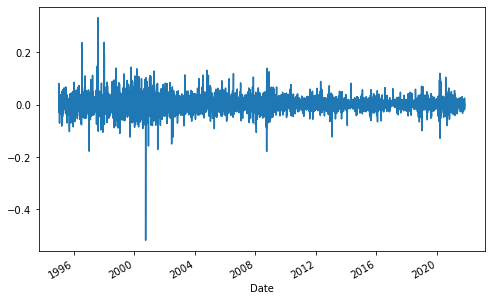

In [14]:
AAPL['simple_return'].plot(figsize = (8,5))#Size of the graph in the output

Average rate of return a stock will have. 
Much lower than 1%, an average annual rate of return will tell us more and give us more interpretability 

In [15]:
avg_return_d = AAPL['simple_return'].mean()
avg_return_d

0.001310223305483131

In [16]:
avg_return_a = AAPL['simple_return'].mean() * 250 #trading days per year is 250
avg_return_a 

str(round(avg_return_a,2)* 100) + '%'

'33.0%'

Alternative Way to calculate returns: Log
Log: Single stock : log returns, from 1995 until today

In [17]:
AAPL['log_return'] = np.log(AAPL['Adj Close'] / AAPL['Adj Close'].shift(1))
AAPL['log_return'] #most values are less than 1% 

Date
1995-01-03         NaN
1995-01-04    0.025726
1995-01-05   -0.012782
1995-01-06    0.077319
1995-01-09   -0.019156
                ...   
2021-10-26    0.004564
2021-10-27   -0.003153
2021-10-28    0.024684
2021-10-29   -0.018322
2021-11-01   -0.005623
Name: log_return, Length: 6757, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

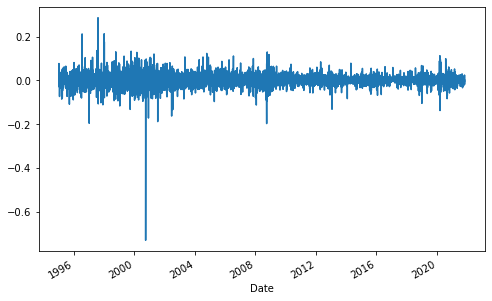

In [18]:
AAPL['log_return'].plot(figsize=(8,5))
plt.show

In [19]:
log_return_d = AAPL['log_return'].mean()
log_return_d

0.0009234094903298959

In [20]:
log_return_a = AAPL['log_return'].mean() * 250
log_return_a

0.23085237258247396

In [21]:
str(round(log_return_a, 5)* 100) + "%"

'23.085%'

Use simple returns to calculate multiple returns for the same period 
Log return: use this when we have one security and needs to calculate over multiple time periods

Calculating the rate of return of a portfolio 
Average annual rate of return is provided: 
AAPL: 0.318524 *25% = 0.079631
IBM: 0.153581* 25% = 0.038395
GE: 0.116717* 25% = 0.029179
Ford: 0.126224* 25% = 0.031556

Add up all the returns = 0.178761

Calculate historical rate of return: Expected rate of return in the future 
rate of return for a security * weight in portfolio 
- if stocks are equally distributed: each stocks weight will be 25%
#Calculation same for not equally wighted portfolio

In [22]:
tickers = ['AAPL', 'MSFT', 'F','GE']
my_data = pd.DataFrame()
for t in tickers: 
    my_data[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [23]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6757 entries, 1995-01-03 to 2021-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    6757 non-null   float64
 1   MSFT    6757 non-null   float64
 2   F       6757 non-null   float64
 3   GE      6757 non-null   float64
dtypes: float64(4)
memory usage: 263.9 KB


In [24]:
my_data.head()

,AAPL,MSFT,F,GE
Date,,,,
1995-01-03,0.290871,2.379200,4.380181,32.906116
1995-01-04,0.298451,2.396494,4.498034,32.906116
1995-01-05,0.294660,2.356963,4.458751,32.986744
1995-01-06,0.318347,2.396494,4.458751,32.825462
1995-01-09,0.312307,2.381670,4.537321,32.502853


In [25]:
my_data.tail()

,AAPL,MSFT,F,GE
Date,,,,
2021-10-26,149.320007,310.109985,15.940000,107.440002
2021-10-27,148.850006,323.170013,15.510000,103.849998
2021-10-28,152.570007,324.350006,16.860001,105.260002
2021-10-29,149.800003,331.619995,17.080000,104.870003
2021-11-01,148.960007,329.369995,17.950001,106.230003


Create a line chart to see how the securities performed 
P1 / P0 *100 <= helps us normalize the data to 100
The formula will find the adjusted cloase value of a certain date from the first number and multiply the quotient by 100 - normalize it to 100 
The first row/first row will always be 1. Therefore, 100

In [26]:
my_data.iloc[0] # The iloc[0] indexing with 0, will extract the data from the first column of the table

AAPL     0.290871
MSFT     2.379200
F        4.380181
GE      32.906116
Name: 1995-01-03 00:00:00, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

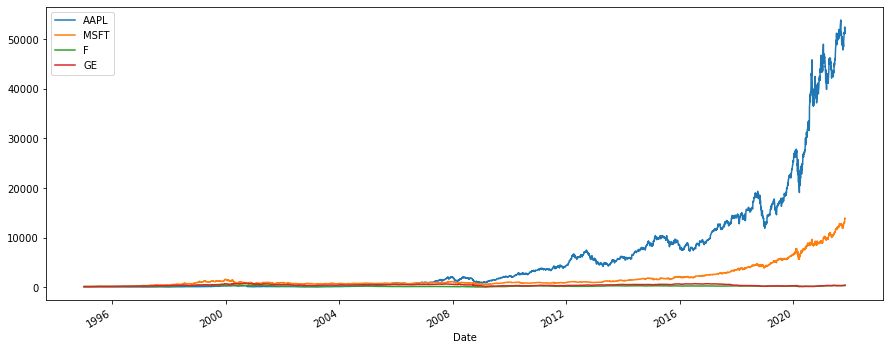

In [27]:
(my_data/my_data.iloc[0]*100).plot(figsize = (15,6)); 
plt.show
#Here in the graph, all graphs start from the vertical axis and point starts at 100
#The idea behind this is to compare the behavior between these 4 different stocks as if they were all starting from the same value, 100

<AxesSubplot:xlabel='Date'>

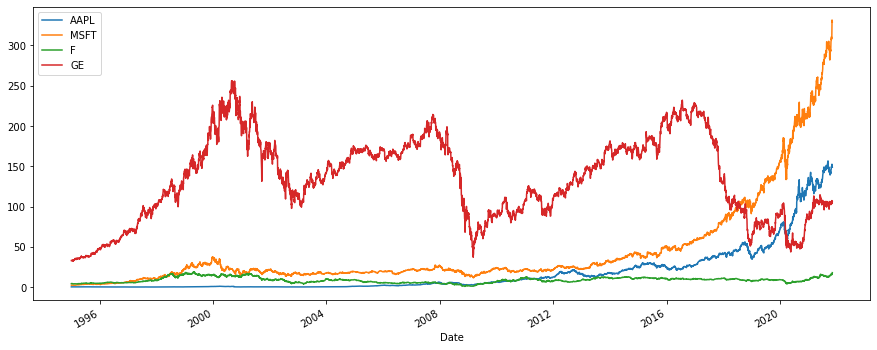

In [28]:
my_data.plot(figsize = (15,6))
#adjusted closing plotted directed, normalization tackels this issue 
# MSFT is the clear winner, beats other stocks performance. This graph helps us understand which stocks performed better, 
# historically


In [29]:
my_data.loc['1995-01-03'] # to apply loc we need to indicate the precise location. Why? the dates are lables 

AAPL     0.290871
MSFT     2.379200
F        4.380181
GE      32.906116
Name: 1995-01-03 00:00:00, dtype: float64

In [30]:
my_data.iloc[0]

AAPL     0.290871
MSFT     2.379200
F        4.380181
GE      32.906116
Name: 1995-01-03 00:00:00, dtype: float64

Calculate a simple return of these stocks by creating a new table.
Why simple returns? it is a preferred way when we have multiple stocks of the same time period 

In [31]:
returns = (my_data/my_data.shift(1)) - 1
returns.head()

,AAPL,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,0.026060,0.007269,0.026906,0.000000
1995-01-05,-0.012700,-0.016495,-0.008733,0.002450
1995-01-06,0.080386,0.016772,0.000000,-0.004889
1995-01-09,-0.018973,-0.006186,0.017622,-0.009828


In [32]:
weights = np.array([0.25,0.25,0.25,0.25]) #weights must always = 1

In [33]:
np.dot(returns,weights) #allows us to calculate matrix or vector products strightaway 
#dot product : the output.
# we are multiplying the returns we obtained and the weights
# We got an entire array, because we multiplied the entire array instead of calculating the average of the entire portfolio 
#first

array([        nan,  0.01505861, -0.00886966, ...,  0.03231522,
        0.00340047,  0.01287823])

In [34]:
annual_returns = returns.mean() * 250 
annual_returns # calculates the average annual returns of all the stocks 

AAPL    0.327556
MSFT    0.231566
F       0.131871
GE      0.094705
dtype: float64

In [35]:
np.dot(annual_returns, weights)

0.1964244573254696

In [36]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + '%'
print (pfolio_1)

19.642%


In [37]:
weights_2 = np.array([0.4,0.4,0.15,0.05])
pfolio_2 = str(round(np.dot(annual_returns, weights_2),5)*100) + '%'
print(pfolio_1)
print(pfolio_2)

19.642%
24.816%


Market index: to provide an overall 
Stock Indices: If you want to understand if you want to see if the stock you have is good, compare the stock with the overall market performance 
Stock index: give you the type of return you can expect 
Indices: baskets composed of many stocks

Calculating the Return of Indices 

In [38]:
import numpy as np 
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib as plt

In [39]:
tickers = ['^GSPC', '^IXIC', '^DJI' ,'^RUT']
ind_data = pd.DataFrame()

for t in tickers: 
    ind_data[t] = wb.DataReader(t, data_source='yahoo', start='2021-1-1')['Adj Close']

In [40]:
ind_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210 entries, 2021-01-04 to 2021-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   210 non-null    float64
 1   ^IXIC   210 non-null    float64
 2   ^DJI    210 non-null    float64
 3   ^RUT    210 non-null    float64
dtypes: float64(4)
memory usage: 8.2 KB


In [41]:
ind_data.head()

,^GSPC,^IXIC,^DJI,^RUT
Date,,,,
2021-01-04,3700.649902,12698.450195,30223.890625,1945.910034
2021-01-05,3726.860107,12818.959961,30391.599609,1979.109985
2021-01-06,3748.139893,12740.790039,30829.400391,2057.919922
2021-01-07,3803.790039,13067.480469,31041.130859,2096.889893
2021-01-08,3824.679932,13201.980469,31097.970703,2091.659912


In [42]:
ind_data.tail()

,^GSPC,^IXIC,^DJI,^RUT
Date,,,,
2021-10-26,4574.790039,15235.709961,35756.878906,2296.080078
2021-10-27,4551.680176,15235.839844,35490.691406,2252.489990
2021-10-28,4596.419922,15448.120117,35730.480469,2297.979980
2021-10-29,4605.379883,15498.389648,35819.558594,2297.189941
2021-11-01,4613.669922,15595.915039,35913.839844,2358.121094


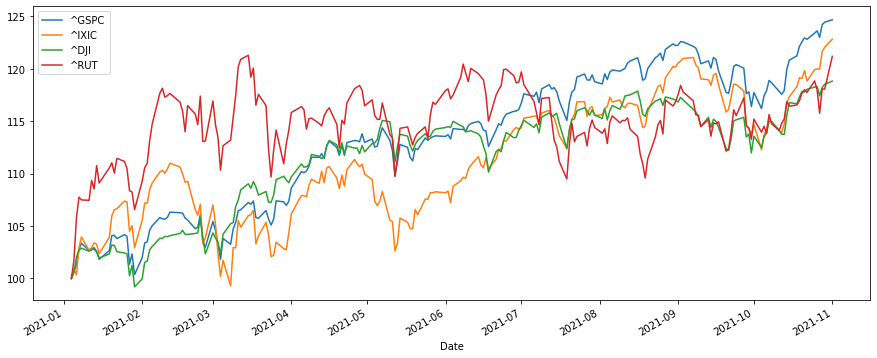

In [43]:
(ind_data/ind_data.iloc[0]*100).plot(figsize = (15,6));
# General rise of the indeces value with occasional drop 

In [44]:
ind_return = (ind_data/ind_data.shift(1)) -1
ind_return.tail()

,^GSPC,^IXIC,^DJI,^RUT
Date,,,,
2021-10-26,0.001820,0.000591,0.000440,-0.007161
2021-10-27,-0.005052,0.000009,-0.007444,-0.018985
2021-10-28,0.009829,0.013933,0.006756,0.020195
2021-10-29,0.001949,0.003254,0.002493,-0.000344
2021-11-01,0.001800,0.006293,0.002632,0.026524


In [45]:
annual_ind_return = ind_return.mean() * 250 
annual_ind_return #average of the company under the indecise have all provided positive returns over the past 2 decades
#GSPC: S&P 
#IXIC: Nasdaq
#DJI: Dow Jones
#RUT: Russell 2000

^GSPC    0.271714
^IXIC    0.261094
^DJI     0.213454
^RUT     0.253362
dtype: float64

In [46]:
tickers = ['AAPL', '^IXIC', '^DJI', '^RUT']
ind_data_2 = pd.DataFrame()

for t in tickers: 
    ind_data_2[t] = wb.DataReader(t, data_source='yahoo', start='2021-1-1')['Adj Close']

In [47]:
ind_data_2.tail()

,AAPL,^IXIC,^DJI,^RUT
Date,,,,
2021-10-26,149.320007,15235.709961,35756.878906,2296.080078
2021-10-27,148.850006,15235.839844,35490.691406,2252.489990
2021-10-28,152.570007,15448.120117,35730.480469,2297.979980
2021-10-29,149.800003,15498.389648,35819.558594,2297.189941
2021-11-01,148.960007,15595.915039,35913.839844,2358.121094


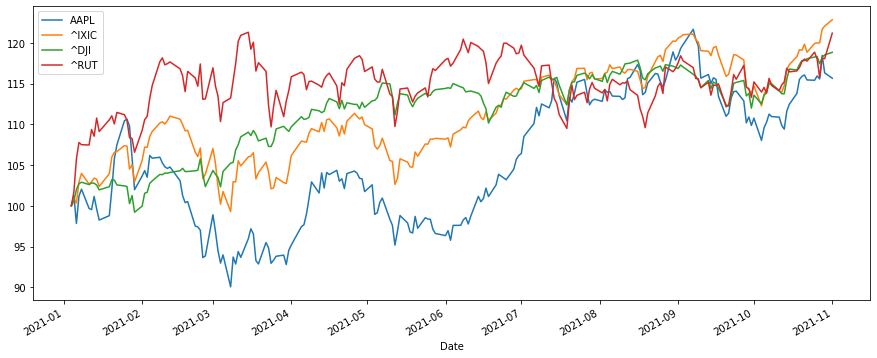

In [48]:
(ind_data_2/ind_data_2.iloc[0] * 100 ).plot(figsize = (15,6)); # apple over-performed over time


Risk: $1000 - 15% earned. How is the average made? 
Variability: best measure of risk 
Volatile: Deviate from historical return, have both positive and negative suprises 
GOod idea about Rate of return -- Risk Averse (investors) 
- Variance
- Standard Deviation - when we try to quantify risk in the dispersion of the likely outcome
Variance: measure the dispersion of a set of data points around the mean
0.16 <- sd: 40% - higher sd and vairance, a lot riskier  

Calculating Risks of security 

In [49]:
tickers = ['AAPL' , 'GM']

sec_data = pd.DataFrame()

for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2015-01-01')['Adj Close']

In [50]:
sec_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1721 entries, 2015-01-02 to 2021-11-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1721 non-null   float64
 1   GM      1721 non-null   float64
dtypes: float64(2)
memory usage: 40.3 KB


The sd of a companies returns is also called a risk or volatility, a stock whose return shows large deviation from its mean is said to be more volatile

In [51]:
sec_data.tail()

,AAPL,GM
Date,,
2021-10-26,149.320007,57.369999
2021-10-27,148.850006,54.259998
2021-10-28,152.570007,54.240002
2021-10-29,149.800003,54.430000
2021-11-01,148.960007,55.490002


In [52]:
sec_returns = np.log(sec_data/sec_data.shift(1))
sec_returns.tail()

,AAPL,GM
Date,,
2021-10-26,0.004564,-0.006775
2021-10-27,-0.003153,-0.055734
2021-10-28,0.024684,-0.000369
2021-10-29,-0.018322,0.003497
2021-11-01,-0.005623,0.019287


THIS IS FOR APPLE: Calculating the risk of a security 

In [53]:
sec_returns['AAPL'].mean()

0.0010427649715703412

In [54]:
sec_returns['AAPL'].mean() *250

0.2606912428925853

In [55]:
sec_returns['AAPL'].std()

0.018334652700719437

In [56]:
sec_returns['AAPL'].std() * 250 ** 0.5

0.2898963132121546

THIS IS FOR GENERAL MOTORS: Calculating the risk of a security 

In [57]:
sec_returns['GM'].mean()

0.0004001809038917423

In [58]:
sec_returns['GM'].mean() *250

0.10004522597293558

In [59]:
sec_returns['GM'].std()

0.021876450819232035

In [60]:
sec_returns['GM'].std() * 250 ** 0.5

0.34589705854714853

In [61]:
sec_returns[['AAPL','GM']].mean() *250

AAPL    0.260691
GM      0.100045
dtype: float64

In [62]:
sec_returns[['AAPL','GM']].std() *250 ** 0.5

AAPL    0.289896
GM      0.345897
dtype: float64

Stocks with higer expected return often have more risk
GM has more dispersion since more riskier

The relationship between financial securities 
- Jobs
- Business
- Consumer Spending
All these are favorable macroeconomic conditions which facilitate the business of all companies
In recession, consumer spending goes down, economy doing food, srock prices are higher 
- Companies shares are inflenced by the state of the company
- Time of crisis: Car companies are impacted more than supermarket as people stop buying cars here but wont stop buying cars 
- Walmart operates in different industry that facebook and linkedin (buying one or another when you already have one)
- It is better to invest in companies operating in different industries 
- There is a relationship between prices of companies, which will help us optimize investment portfolios

Measuring the relationship between stocks 
- House Price: Typically larger houses are more expensive 
- The correlation coefficient measure the relatiosnhip between 2 variables 
- Co-variance: cant be of different values 
- Correlation adjusts covariance
- Perfect correlation: entire variablily of the second variable is explained by the first variable
    - for every additional sq. foot of size we would expect an increase of $1000 
    - for 5 additinal sq. feet, price of house will increase by $5000
    - Likely to observe imperfect correlation. 
Variables that determine share prices: (1) Industry growth (2) Revenue Growth (3)Profitablity (4) Regulatory environment 
    The more similar the context in which the two companies operate, the more correlation there will be between their share prices (infleunced by same or similar factors)
    No correlation: means they are independent from each other (nothing in common)
    Negative Correlation: Ice cream producers and Umbrella's producer (one of the companies makes more money, other wont)
    - price of the company stock is influenced by the same vairable, but impacts businesses in a different way 

Covariance and Correlation 
Representation of how 2 or more vairables relate to each other
ALong the diagonal - variance of the variable and rest is co-variance between them
Here, we use 2 stocks 
var(AAPL)          | cov(AAPL, GM)
cov(GM, AAPL)      | var (GM) 

In [63]:
AAPL_var = sec_returns['AAPL'].var()
AAPL_var_a = sec_returns['AAPL'].var() *250
AAPL_var_a

0.08403987241399964

In [64]:
GML_var = sec_returns['GM'].var()
GM_var_a = sec_returns['GM'].var() *250
GM_var_a

0.11964477511156948

In [67]:
cov_matrix = sec_returns.cov()
cov_matrix_a = sec_returns.cov() * 250
cov_matrix_a

,AAPL,GM
AAPL,0.084040,0.035196
GM,0.035196,0.119645


In [66]:
corr_matrix = sec_returns.corr() 
corr_matrix

,AAPL,GM
AAPL,1.000000,0.350999
GM,0.350999,1.000000
